In [34]:
# https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
#https://pyramid-arima.readthedocs.io/en/latest/_submodules/arima.html
import numpy
from numpy import newaxis
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from pyramid.arima import auto_arima

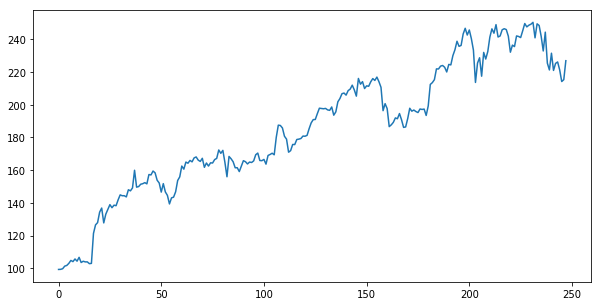

In [35]:
dataset = pandas.read_csv('NVDA.csv', usecols=[1], engine='python', skipfooter=3)
dataset = numpy.flipud(dataset)[1::]
plt.figure(figsize=(10,5))
plt.plot(dataset)
plt.show()
#dataset = dataframe.values
dataset = dataset.astype('float32')

In [36]:
# fix random seed for reproducibility
#numpy.random.seed(7)

In [37]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [38]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

166 82


In [39]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [40]:
# reshape into X=t and Y=t+1
look_back = 15
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [41]:
trainX.shape

(150, 15)

In [42]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [43]:
trainX.shape

(150, 1, 15)

In [44]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(64, input_shape=(1, look_back)))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=1, verbose=2)

Epoch 1/200
 - 1s - loss: 0.0948
Epoch 2/200
 - 1s - loss: 0.0686
Epoch 3/200
 - 0s - loss: 0.0633
Epoch 4/200
 - 0s - loss: 0.0578
Epoch 5/200
 - 0s - loss: 0.0584
Epoch 6/200
 - 0s - loss: 0.0601
Epoch 7/200
 - 0s - loss: 0.0605
Epoch 8/200
 - 0s - loss: 0.0500
Epoch 9/200
 - 0s - loss: 0.0527
Epoch 10/200
 - 0s - loss: 0.0538
Epoch 11/200
 - 0s - loss: 0.0493
Epoch 12/200
 - 0s - loss: 0.0486
Epoch 13/200
 - 0s - loss: 0.0485
Epoch 14/200
 - 0s - loss: 0.0451
Epoch 15/200
 - 0s - loss: 0.0457
Epoch 16/200
 - 0s - loss: 0.0478
Epoch 17/200
 - 0s - loss: 0.0404
Epoch 18/200
 - 0s - loss: 0.0436
Epoch 19/200
 - 0s - loss: 0.0502
Epoch 20/200
 - 0s - loss: 0.0446
Epoch 21/200
 - 0s - loss: 0.0430
Epoch 22/200
 - 0s - loss: 0.0452
Epoch 23/200
 - 0s - loss: 0.0456
Epoch 24/200
 - 0s - loss: 0.0413
Epoch 25/200
 - 0s - loss: 0.0428
Epoch 26/200
 - 0s - loss: 0.0426
Epoch 27/200
 - 0s - loss: 0.0442
Epoch 28/200
 - 0s - loss: 0.0406
Epoch 29/200
 - 0s - loss: 0.0411
Epoch 30/200
 - 0s - lo

In [45]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 4.72 RMSE
Test Score: 10.98 RMSE


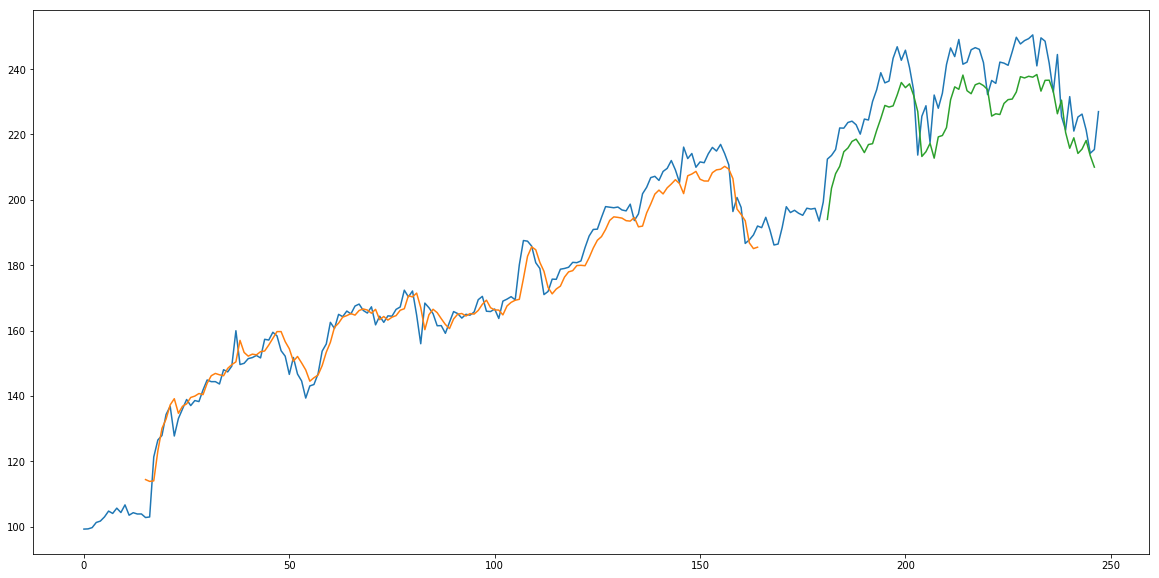

In [46]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [47]:
train2 = dataset
trainX2, trainY2 = create_dataset(train2, look_back)
trainX2 = numpy.reshape(trainX2, (trainX2.shape[0], 1, trainX2.shape[1]))
trainX2.shape, trainY2.shape

((232, 1, 15), (232,))

In [48]:
model2 = Sequential()
model2.add(LSTM(64, input_shape=(1, look_back)))
model2.add(Dropout(0.3))
model2.add(Dense(1))
model2.compile(loss='mean_absolute_error', optimizer='adam')
model2.fit(trainX2, trainY2, epochs=200, batch_size=1, verbose=2)

Epoch 1/200
 - 1s - loss: 0.1104
Epoch 2/200
 - 0s - loss: 0.0672
Epoch 3/200
 - 0s - loss: 0.0674
Epoch 4/200
 - 0s - loss: 0.0622
Epoch 5/200
 - 0s - loss: 0.0659
Epoch 6/200
 - 0s - loss: 0.0659
Epoch 7/200
 - 0s - loss: 0.0626
Epoch 8/200
 - 0s - loss: 0.0603
Epoch 9/200
 - 0s - loss: 0.0565
Epoch 10/200
 - 0s - loss: 0.0625
Epoch 11/200
 - 0s - loss: 0.0555
Epoch 12/200
 - 0s - loss: 0.0603
Epoch 13/200
 - 0s - loss: 0.0554
Epoch 14/200
 - 0s - loss: 0.0583
Epoch 15/200
 - 0s - loss: 0.0568
Epoch 16/200
 - 0s - loss: 0.0537
Epoch 17/200
 - 0s - loss: 0.0509
Epoch 18/200
 - 0s - loss: 0.0496
Epoch 19/200
 - 0s - loss: 0.0467
Epoch 20/200
 - 0s - loss: 0.0514
Epoch 21/200
 - 0s - loss: 0.0538
Epoch 22/200
 - 0s - loss: 0.0540
Epoch 23/200
 - 0s - loss: 0.0501
Epoch 24/200
 - 0s - loss: 0.0530
Epoch 25/200
 - 0s - loss: 0.0504
Epoch 26/200
 - 0s - loss: 0.0472
Epoch 27/200
 - 0s - loss: 0.0492
Epoch 28/200
 - 0s - loss: 0.0490
Epoch 29/200
 - 0s - loss: 0.0511
Epoch 30/200
 - 0s - lo

In [49]:
# make predictions
trainPredict2 = model2.predict(trainX2)
# invert predictions
trainPredict2 = scaler.inverse_transform(trainPredict2)
trainY2 = scaler.inverse_transform([trainY2])
# calculate root mean squared error
trainScore2 = math.sqrt(mean_squared_error(trainY2, trainPredict2.T))
print('Train Score2: %.2f RMSE' % (trainScore2))

Train Score2: 7.70 RMSE


In [50]:
trainY2.shape, trainPredict2.shape

((1, 232), (232, 1))

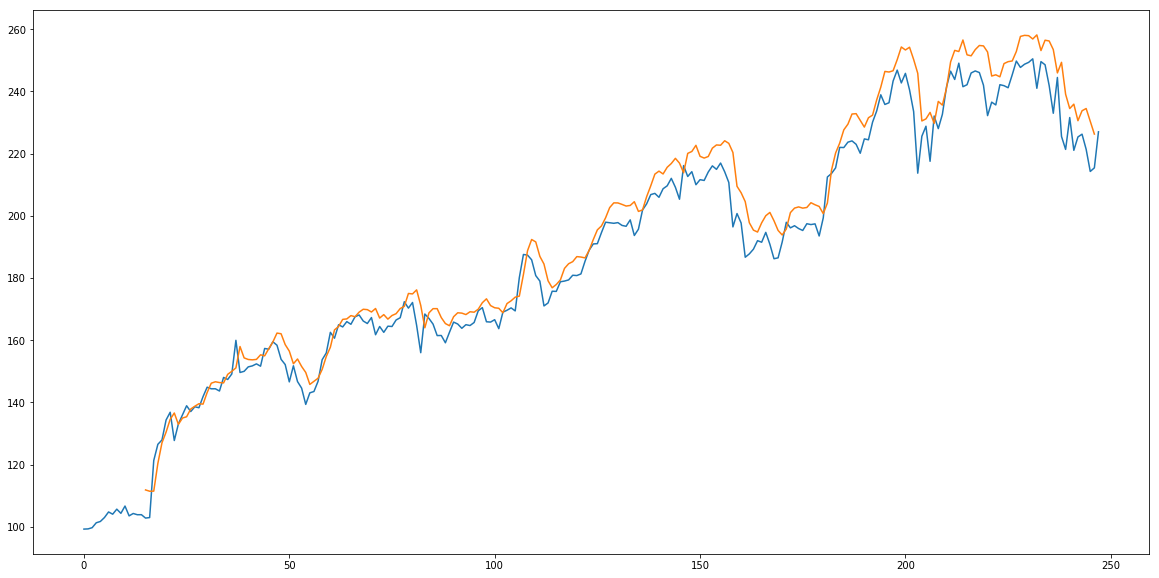

In [51]:
# shift train predictions for plotting
trainPredictPlot2 = numpy.empty_like(dataset)
trainPredictPlot2[:, :] = numpy.nan
trainPredictPlot2[look_back:len(trainPredict2)+look_back, :] = trainPredict2

# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot2)
plt.show()

In [52]:
import pandas as pd
#from plotly.plotly import plot_mpl
#from statsmodels.tsa.seasonal import seasonal_decompose

In [53]:
#trainPredict2 = pd.DataFrame(trainPredict2)
#result = seasonal_decompose(trainPredict2, model='multiplicative')
#fig = result.plot()
#plot_mpl(fig)

In [54]:
numpy.savetxt("LSTM_Predicted.csv", trainPredict2, delimiter=",")

In [55]:
stepwise_model = auto_arima(trainPredict2, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=7,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=1175.038, BIC=1192.271, Fit time=0.661 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 7); AIC=1240.293, BIC=1254.080, Fit time=0.113 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 7); AIC=1178.185, BIC=1191.972, Fit time=0.399 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 7); AIC=1172.208, BIC=1192.888, Fit time=0.534 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 7); AIC=1242.293, BIC=1259.527, Fit time=0.209 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 7); AIC=1174.228, BIC=1198.355, Fit time=1.261 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 7); AIC=1330.557, BIC=1344.344, Fit time=0.081 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 7); AIC=1176.196, BIC=1203.770, Fit time=1.102 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 

In [56]:
print(stepwise_model.aic())

1171.24410187


In [60]:
n_periods = 15
future_forecast = stepwise_model.predict(n_periods=n_periods)
print(future_forecast)
trainPredict2full = numpy.append(trainPredict2,future_forecast)

[ 225.39410602  225.54100394  226.23788118  225.81827519  224.85193988
  225.8764047   225.04408465  224.81357279  225.49075497  225.33024207
  225.45656808  224.71514835  224.89903826  223.52739331  223.15244042]


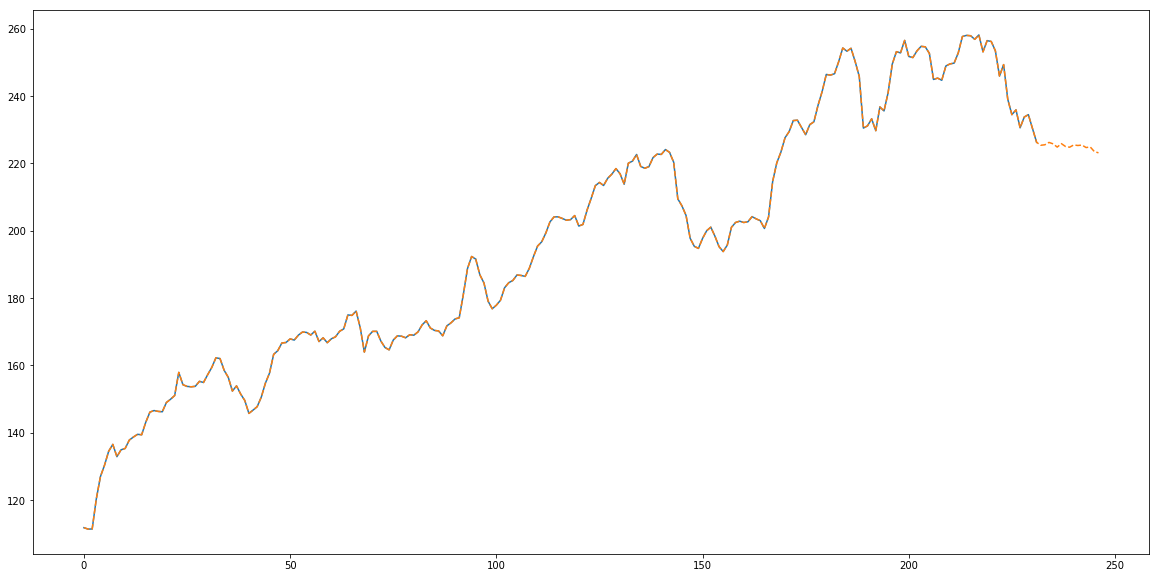

In [61]:
plt.figure(figsize=(20,10))
plt.plot(trainPredict2)
plt.plot(trainPredict2full, '--')
plt.show()